# Efficiency curves using TDCRPy

In [4]:
# pip install TDCRPy --upgrade

In [5]:
import tdcrpy as td
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
mode = "eff"                # ask for efficiency calculation
Rad="Co-60"                 # radionuclides
pmf_1="1"                   # relatives fractions of the radionulides
N = 1000                     # number of Monte Carlo trials
kB =1.0e-5                  # Birks constant in cm keV-1
V = 10                      # volume of scintillator in mL
L=np.logspace(-3,2,num=100) # free parameter in keV-1

# Record decay histories in temporary files
td.TDCRPy.TDCRPy(L[0], Rad, pmf_1, N, kB, V, mode, barp=True, record=True)

effS, u_effS, effD, u_effD, effT, u_effT, effD2, u_effD2 = [], [],[], [],[], [], [], []
for l in tqdm(L, desc="free parameters ", unit=" iterations"):
  out = td.TDCRPy.TDCRPy(l, Rad, pmf_1, N, kB, V, mode, readRecHist=True)
  effS.append(out[2])
  u_effS.append(out[3])
  effD.append(out[2])
  u_effD.append(out[3])
  effT.append(out[4])
  u_effT.append(out[5])
  effD2.append(out[12])
  u_effD2.append(out[13])


 ______  ______  ______ _______  ________
|__  __||  ___ \|  ___||  ___ | |  ____ |
  | |   | |  | || |    | |  | | | |___| |___     ___
  | |   | |  | || |    | |__| | |  _____|\  \   |  |
  | |   | |__| || |____|  __  \ | |       \  \  |  |
  |_|   |_____/ |_____||_|  \__\|_|        \  \_|  |
  +++++++++++++++++++++++++++++++++++++++++/      /
  ________________________________________/      /
 |______________________________________________/     


version 2.0.2
BIPM 2023 - license MIT 
distribution: https://pypi.org/project/TDCRPy 
developement: https://github.com/RomainCoulon/TDCRPy 

start calculation...


free parameters : 100%|█████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.96 iterations/s]


Text(0, 0.5, '$\\epsilon_{D}$')

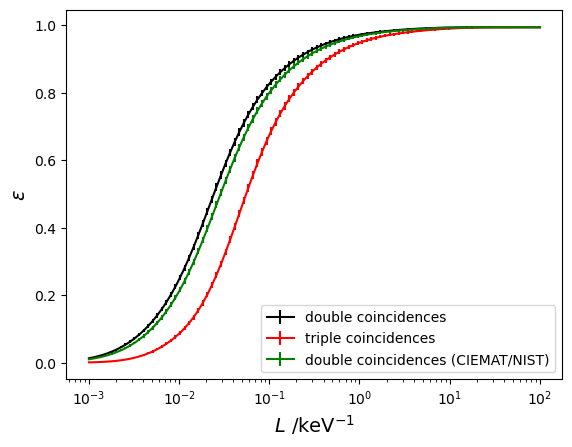

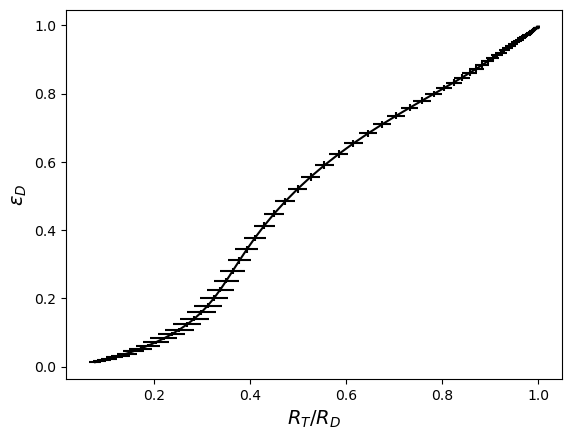

In [14]:
effS=np.asarray(effS)
effT=np.asarray(effT)
effD=np.asarray(effD)
effD2=np.asarray(effD2)
u_effS=np.asarray(u_effS)
u_effT=np.asarray(u_effT)
u_effD=np.asarray(u_effD)
u_effD2=np.asarray(u_effD2)

tdcr=effT/effD
u_tdcr=np.sqrt(u_effD**2*effT**2/effD**4+u_effT**2/effD**2)

plt.figure("efficiency vs free parameter")
plt.clf()
plt.errorbar(L,effD,yerr=u_effD,fmt="-k",label="double coincidences")
plt.errorbar(L,effT,yerr=u_effT,fmt="-r",label="triple coincidences")
plt.errorbar(L,effD2,yerr=u_effD2,fmt="-g",label="double coincidences (CIEMAT/NIST)")
plt.xscale('log')
plt.xlabel(r'$L$ /keV$^{-1}$', fontsize=14)
plt.ylabel(r'$\epsilon$', fontsize=14)
plt.legend()

plt.figure("efficiency vs TDCR")
plt.clf()
plt.errorbar(tdcr,effD,xerr=u_tdcr,yerr=u_effD,fmt="-k")
#plt.xscale('log')
plt.xlabel(r'$R_T/R_D$', fontsize=14)
plt.ylabel(r'$\epsilon_{D}$', fontsize=14)